<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [13]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [19]:
# Display the variables (column names) in Sheet1
variables = sheet1_data.columns.tolist()

variables


['SN',
 'VESSEL',
 'REFERENCE NUMBER',
 'VOYAGE NUMBER',
 'LOA',
 'ROT',
 'BERTH',
 'DRAFT (ARRIVAL)',
 'DRAFT (DEPARTURE)',
 'LINE',
 'SERVICE',
 "DISCHARGED-(FULL/ FCL-20')",
 "DISCHARGED-(FULL/ FCL-40')",
 "DISCHARGED-(FULL/ LCL-20')",
 "DISCHARGED-(FULL/ LCL-40')",
 "DISCHARGED-(EMPTY-20')",
 "DISCHARGED-(EMPTY-40')",
 "DISCHARGED-(REEFER-20')",
 "DISCHARGED-(REEFER-40')",
 "DISCHARGED-(HAZARDOUS-20')",
 "DISCHARGED-(HAZARDOUS-40')",
 "DISCHARGED-(OUT OF GAUGE-20')",
 "DISCHARGED-(OUT OF GAUGE-40')",
 "DISCHARGED-(TRANS SHIPMENT-20')",
 "DISCHARGED-(TRANS SHIPMENT-40')",
 "DISCHARGED-(ON BOARD SHIFTING-20')",
 "DISCHARGED-(ON BOARD SHIFTING-40')",
 "DISCHARGED-(SHIFTING VIA QUAY-20')",
 "DISCHARGED-(SHIFTING VIA QUAY-40')",
 "LOADED-(FULL/ FCL-20')",
 "LOADED-(FULL/ FCL-40')",
 "LOADED-(FULL/ LCL-20')",
 "LOADED-(FULL/ LCL-40')",
 "LOADED-(EMPTY-20')",
 "LOADED-(EMPTY-40')",
 "LOADED-(REEFER-20')",
 "LOADED-(REEFER-40')",
 "LOADED-(HAZARDOUS-20')",
 "LOADED-(HAZARDOUS-40')",
 "LOAD

In [27]:
# Convert date columns to datetime format,
date_columns = ['ARRIVED_O/A', 'ARRIVED_BERTH', 'COMMENCE_OPS', 'COMPL._OP', 'TIME/DATE_SAILED']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [28]:
# Display unique values of the 'MACHINE TYPE' column
unique_machine_types = data['MACHINE TYPE'].unique()

unique_machine_types


array(['SSG', 'SC', nan, 'SSG ', 'SS', 'SC ', 'SCG', 'SGG'], dtype=object)

In [30]:
# Replace 'SS' with 'SC' in the 'MACHINE TYPE' column
data['MACHINE TYPE'] = data['MACHINE TYPE'].str.strip()
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SS','SC')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SGG','SSG')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SCG','SSG')

# Re-check unique values after replacement
unique_machine_types_final = data['MACHINE TYPE'].unique()

# Display the updated unique values
unique_machine_types_final


array(['SSG', 'SC', nan], dtype=object)

In [35]:
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate the new variables
data['WAITING_TIME_TO_DOCK'] = data['ARRIVED BERTH'] - data['ARRIVED O/A']
data['WAITING_OPERATIONS'] = data['COMMENCE OPS'] - data['ARRIVED BERTH']
data['OPERATION_TIME'] = data['COMPL. OP'] - data['COMMENCE OPS']
data['UNLOADING_TIME'] = data['TIME/DATE SAILED'] - data['COMPL. OP']

# Display the updated dataset with the new variables
data.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,ROT,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,...,SHIP WORKING HOURS,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,NaN,4294,9,7.6,8.7,MSK,...,20.66,25.605034,2.512467,16.318766,18.085470,SSG,7 days 09:08:00,0 days 01:10:00,1 days 05:15:00,0 days 02:00:00
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,NaN,4353,10,3.2,4.5,MSC,...,11.75,8.340426,0.746004,4.215054,4.900000,SC,4 days 11:07:00,0 days 01:05:00,0 days 20:00:00,0 days 02:10:00
2,3,MANTENHA,MSCC/MVMANT/160R,160R,NaN,4270,9,3.4,4.5,MSC,...,12.25,8.163265,0.346861,3.296703,3.921569,SC,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,NaN,4259,11,11.4,9.7,HDSC,...,48.57,23.800700,3.630463,17.232298,18.595174,SSG,10 days 10:20:00,0 days 02:10:00,2 days 14:10:00,0 days 02:45:00
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,NaN,4299,9,11.2,10,MSC,...,29.00,30.275862,3.053913,19.191257,21.029940,SSG,10 days 00:45:00,0 days 01:30:00,1 days 17:45:00,0 days 02:30:00


In [86]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = data[
    (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)) |
    (data['WAITING_OPERATIONS'] < pd.Timedelta(0)) |
    (data['OPERATION_TIME'] < pd.Timedelta(0)) |
    (data['UNLOADING_TIME'] < pd.Timedelta(0))
]
negative_values[['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
2,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
345,1 days 02:35:00,1 days 01:30:00,-1 days +17:50:00,0 days 01:20:00
469,2 days 11:44:00,-1 days +19:25:00,2 days 03:15:00,0 days 12:40:00
488,3 days 07:20:00,-1 days +21:10:00,2 days 23:30:00,0 days 01:00:00
628,-18 days +14:50:00,18 days 01:55:00,2 days 06:40:00,0 days 03:00:00
726,1 days 18:25:00,0 days 01:43:00,-28 days +09:52:00,29 days 01:00:00
842,2 days 01:54:00,-1 days +23:04:00,2 days 14:50:00,0 days 00:30:00


In [105]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)).sum(),
    'WAITING_OPERATIONS': (data['WAITING_OPERATIONS'] < pd.Timedelta(0)).sum(),
    'OPERATION_TIME': (data['OPERATION_TIME'] < pd.Timedelta(0)).sum(),
    'UNLOADING_TIME': (data['UNLOADING_TIME'] < pd.Timedelta(0)).sum()
}
negative_counts


{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0}

In [107]:
# Drop rows with negative values in any of the newly created variables
cleaned_data = data[
    (data['WAITING_TIME_TO_DOCK'] >= pd.Timedelta(0)) &
    (data['WAITING_OPERATIONS'] >= pd.Timedelta(0)) &
    (data['OPERATION_TIME'] >= pd.Timedelta(0)) &
    (data['UNLOADING_TIME'] >= pd.Timedelta(0))
]

# Display the shape of the dataset after dropping rows
cleaned_data.shape


(3083, 85)

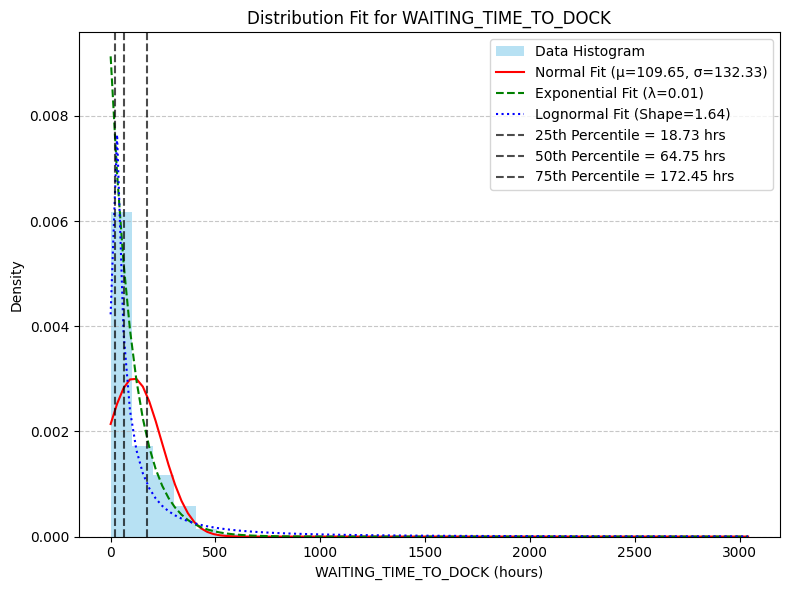

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm

# Convert datetime data to total hours (for numeric operations)
cleaned_data = cleaned_data['WAITING_TIME_TO_DOCK'].dropna()
cleaned_data = cleaned_data.dt.total_seconds() / 3600  # Convert to hours

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the cleaned data histogram
plt.hist(cleaned_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Fit and plot normal distribution
mu, std = norm.fit(cleaned_data)
x = np.linspace(cleaned_data.min(), cleaned_data.max(), 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'r-', label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')

# Fit and plot exponential distribution
loc, scale = expon.fit(cleaned_data)
p_expon = expon.pdf(x, loc, scale)
plt.plot(x, p_expon, 'g--', label=f'Exponential Fit (λ={1/scale:.2f})')

# Fit and plot lognormal distribution
shape, loc_ln, scale_ln = lognorm.fit(cleaned_data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc_ln, scale_ln)
plt.plot(x, p_lognorm, 'b:', label=f'Lognormal Fit (Shape={shape:.2f})')

# Highlight percentiles
percentiles = {'25th Percentile': np.percentile(cleaned_data, 25),
               '50th Percentile': np.percentile(cleaned_data, 50),
               '75th Percentile': np.percentile(cleaned_data, 75)}
for p, value in percentiles.items():
    plt.axvline(value, color='k', linestyle='--', alpha=0.7, label=f'{p} = {value:.2f} hrs')

# Add labels and legend
plt.title('Distribution Fit for WAITING_TIME_TO_DOCK')
plt.xlabel('WAITING_TIME_TO_DOCK (hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
